# World Topography ETOPO

The world topography with 1 degree resolution is provided in local file. 
The data format is called NetCDF. NetCDF files include 'metadata' information
and are 'self-describing'. Code packages exist for reading and writing
NetCDF files. 

We import _xarray_ to read and process the NetCDF data. At the momemt we immediately put the data
into numpy arrays to practice working with numpy arrays.

Our file contains the topography information (elevation for land, ocean floor depth)
and the grid information with longitude and latitude coordinates.



In [35]:
%matplotlib inline

In [36]:
import numpy as np
import matplotlib.pylab as plt
import xarray as xd


## Reading data from a NetCDF file

### What is NetCDF format and who uses it? 
NetCDF is a common data format used in atmospheric, ocean and climate sciences. Many model data output is 
distributed in NetCDF format. You also find remote sensing products in NetCDF format. The format is platform independent, and it is self-describing. That is all 

In [37]:
# PATH to the local NetCDF file
# and NetCDF file name
data_path="/home11/staff/timm/Public/Data/"
data_file=data_path+"etopo60.cdf"

print("open the data file "+data_file)
try:
    nc=xd.open_dataset(data_file) # opens the NetCDF
    failed=False
except:
    print("failed")
    failed=True
if not failed:
    nc.get('rose')
    print(nc.data_vars)
    topo2d=np.array(nc['ROSE']) # ROSE is the NetCDF variable name for the topography data
    lon=np.array(nc['ETOPO60X']) # NetCDF variable name for the longitude
    lat=np.array(nc['ETOPO60Y']) # NetCDF variable name for the latitude
    lon2d, lat2d =np.meshgrid(lon, lat) # takes lon and lat data and makes a full 2-d grid filled with lat and lon values
    print("found longitudes, latitudes, and topography data")
    print("shape of array variable topo2d: ",np.shape(topo2d))
    print("shape of array variable lon2d : ",np.shape(lon2d))
    print("shape of array variable lat2d : ",np.shape(lat2d))
    print("------------------------------------------------")
    print("shape of array variable lat   : ", np.shape(lat))
    print("shape of array variable lon   : ", np.shape(lon))
    
    print(80*'=')
    print("Now let's make some plots ...")
    

open the data file /home11/staff/timm/Public/Data/etopo60.cdf
Data variables:
    ROSE     (ETOPO60Y, ETOPO60X) float32 ...
found longitudes, latitudes, and topography data
shape of array variable topo2d:  (180, 360)
shape of array variable lon2d :  (180, 360)
shape of array variable lat2d :  (180, 360)
------------------------------------------------
shape of array variable lat   :  (180,)
shape of array variable lon   :  (360,)
Now let's make some plots ...


# 1 Plotting 2-dim data

## Variables that contain our data:

- topo2d: a 2-dimensional array with elevation heights and ocean depth data
- lon2d : a 2-dimensional array with longitude grid coordinates (matches dimension of variable topo)
- lat2d : a 2-dimensional array with latitude grid coordinates (matches dimension of variable topo)

- lon and lat: 1-dimensional arrays with the coordinates.


## User defined variables for plot customization

In [38]:
# plot customization
# lev: levels for color shading
# cm:  colormap for fill colors
lev=np.arange(-8000,8500,500) # 1-d numpy array 
cm=plt.get_cmap('gist_earth')
xlabel="Longitude"
ylabel="Latitude"
title="Word Topography & Ocean Bathymetry"

## 1.1 Contour plot

We make use of the function plt.contour. 

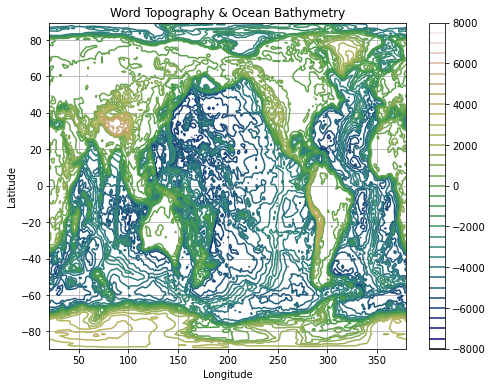

In [39]:
# a map with contour lines contour plot
plt.figure(figsize=[8,6])
plt.contour(lon2d,lat2d,topo2d,levels=lev,cmap=cm)
plt.colorbar()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

plt.grid()
plt.show()


## 1.2 Filled contour plot

We make use of the function plt.contourf. 

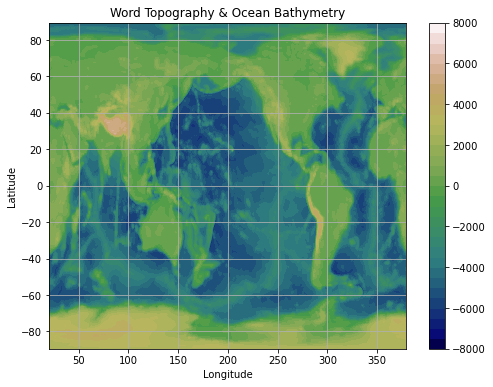

In [40]:
# map with filled contours
plt.figure(figsize=[8,6])
plt.contourf(lon2d,lat2d,topo2d,levels=lev,cmap=cm)
plt.colorbar()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

plt.grid()
plt.show()



## 1.3 Shaded 'mesh' plot 

We make use of the function plt.pcolormesh. 

<ipython-input-41-2d63dcc1565c>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lon2d,lat2d,topo2d,vmin=-8000,vmax=8000)


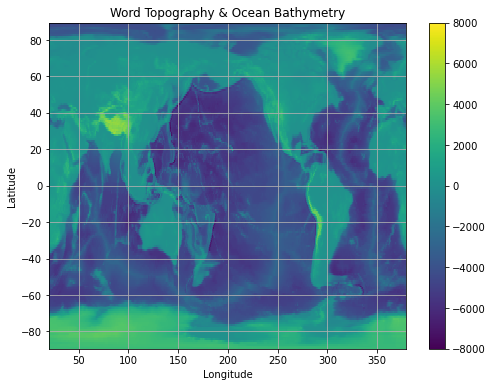

In [41]:
# map with 'grid-tile' filled plots
# pcolormesh does not have the keyword parameter lev! Bummer! 
# We have to use keyword parameters vmin and vmax
# to give the range of the data for our colorscale.

plt.figure(figsize=[8,6])
plt.pcolormesh(lon2d,lat2d,topo2d,vmin=-8000,vmax=8000)
plt.colorbar()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

plt.grid()
plt.show()



## 1.4 Show the 2-d array as an 'image'

We make use of the function plt.imshow. 

<P style="color:red"> 
    There is a 'problem'! 
    <BR>
    plt.imshow() follows a convention used in image processing: the origin is in the top left corner.
</P>
You can see what that does. It turns our view the world up-side-down.
In all the other plots we have to provide x and y coordinates to display the 2-d array, *imshow*
just uses index coordinate system.
 





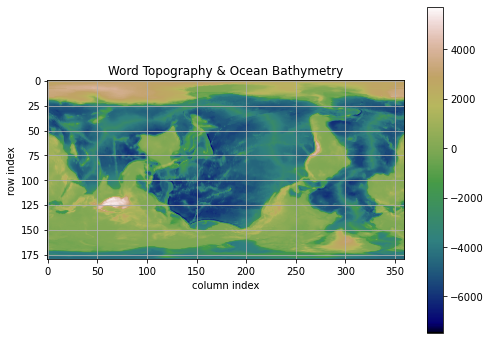

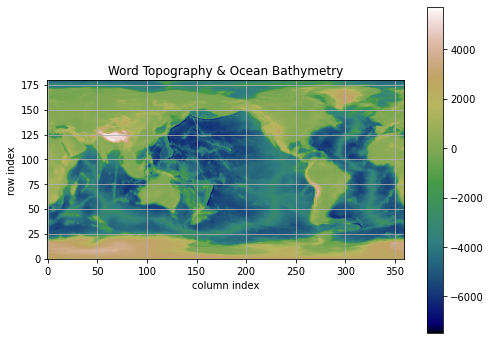

In [42]:
# map with filled contours
plt.figure(figsize=[8,6])
# pcolormesh does not have the keyword parameter lev! Bummer! we have to use vmin and vmax
# to give the range of the data for our colorscale.
plt.imshow(topo2d,cmap=cm,)
plt.colorbar()
plt.xlabel("column index")
plt.ylabel("row index")
plt.title(title)
plt.grid()
plt.show()


# origin fixed
plt.figure(figsize=[8,6])
plt.imshow(topo2d,cmap=cm,origin='lower')
plt.colorbar()
plt.xlabel("column index")
plt.ylabel("row index")
plt.title(title)
plt.grid()
plt.show()

Use plt.imshowto plot the latitude coordinates stored in lat2d! 

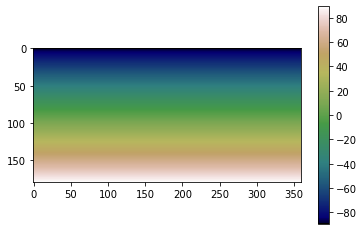

In [43]:
plt.imshow(lat2d,cmap=cm)
plt.colorbar()

## 2 Subsampling 2-dimensional arrays 
## Select North America (USA) rectangular grid and create a new map

Let's zoom into the North American continent region:
Select from the 2-dim arrays the range
 - latitude: 20N-60N
 - longitude: 230E - 310E

### 2.1 Let's start with finding the index ranges by trial and error:

Use the 1-dim array variables  *lon*, and *lat* and find the index positions and j1, j2 in array *lon*
that are giving you the longitudes 230E and 310E. 

The same way find the index positions i1,i2 in array *lat*
that are giving you the latitudes 20N - 60N.

Subsample the 2dim arrays lat2d, lon2d, topo2d using these index ranges and plot the topography of the subsampled region.




[229.5 230.5 231.5 232.5 233.5 234.5 235.5 236.5 237.5 238.5 239.5 240.5
 241.5 242.5 243.5 244.5 245.5 246.5 247.5 248.5 249.5 250.5 251.5 252.5
 253.5 254.5 255.5 256.5 257.5 258.5 259.5 260.5 261.5 262.5 263.5 264.5
 265.5 266.5 267.5 268.5 269.5 270.5 271.5 272.5 273.5 274.5 275.5 276.5
 277.5 278.5 279.5 280.5 281.5 282.5 283.5 284.5 285.5 286.5 287.5 288.5
 289.5 290.5 291.5 292.5 293.5 294.5 295.5 296.5 297.5 298.5 299.5 300.5
 301.5 302.5 303.5 304.5 305.5 306.5 307.5 308.5 309.5 310.5]
[-60.5 -59.5 -58.5 -57.5 -56.5 -55.5 -54.5 -53.5 -52.5 -51.5 -50.5 -49.5
 -48.5 -47.5 -46.5 -45.5 -44.5 -43.5 -42.5 -41.5 -40.5 -39.5 -38.5 -37.5
 -36.5 -35.5 -34.5 -33.5 -32.5 -31.5 -30.5 -29.5 -28.5 -27.5 -26.5 -25.5
 -24.5 -23.5 -22.5 -21.5 -20.5 -19.5]


TypeError: Input z must be 2D, not 1D

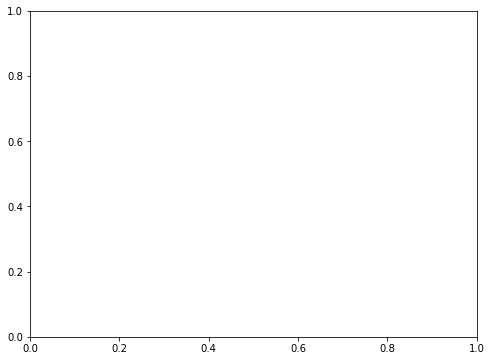

In [44]:
# Manual solution: Look up in lat2d the row index for 20N to 60 deg N

print(lon[209:291])
print(lat[29:71])


a=lon[209:291]
b=lat[29:72]

plt.figure(figsize=[8,6])
plt.contour(a,b)
plt.colorbar()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

plt.grid()
plt.show()

### 2.2 Find the position with numpy code options

Now apply the boolean expressions and use function *np.logical_and* to check the values to create an array containing _True_  or _False_ for selecting the latitude and longitude ranges. Remember to assign the returned array to a new variable so you can make use of the True-False values in the next steps!  


Solve the problem in two steps: 

 - 1) subsample in latitude and confirm by plotting the subsampled array lat2d, lon2d, topo2d and assign the resulting arrays to new variables. Validate your results by making a plot of the topography (or latitude).
 
 - 2) use the newly assigned variables with the subsampled arrays and apply similar methods for the subsampling in longitude. Confirm your results by making a plot of the topography.
 

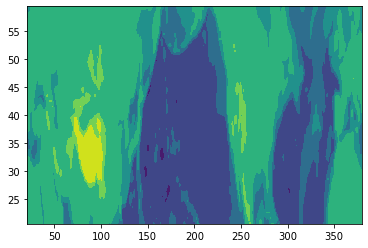

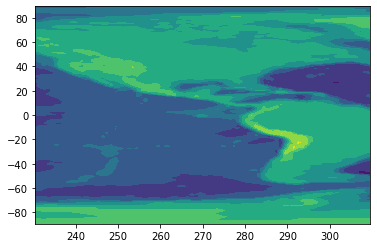

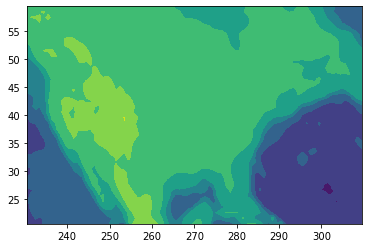

In [53]:
# arrays

is_lat=np.logical_and(lat>20,lat<60)

topo2d_s1=topo2d[is_lat,:]
lat2d_s1=lat2d[is_lat,:]
lon2d_s1=lon2d[is_lat,:]

is_lon=np.logical_and(lon>230,lon<310)

topo2d_s1=topo2d[:,is_lon]
lat2d_s1=lat2d[:,is_lon]
lon2d_s1=lon2d[:,is_lon]

# plots


plt.contourf(lon2d[is_lat,:],lat2d[is_lat,:],topo2d[is_lat,:])
plt.show() # latitude plot



plt.contourf(lon2d[:,is_lon],lat2d[:,is_lon],topo2d[:,is_lon]) 
plt.show() # longitude plot


# intermediate variables

topo2d_lat=topo2d[is_lat,:]
lon2d_lat=lon2d[is_lat,:]
lat2d_lat=lat2d[is_lat,:]

topof=topo2d_lat[:,is_lon]
lonf=lon2d_lat[:,is_lon]
latf=lat2d_lat[:,is_lon]




# final plot


plt.contourf(lonf,latf,topof)
plt.show()

In [19]:
lat[is_lat]

array([20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5,
       31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5,
       42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5,
       53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5])

In [20]:
# helpful function call

lat2d[is_lat,:]

array([[20.5, 20.5, 20.5, ..., 20.5, 20.5, 20.5],
       [21.5, 21.5, 21.5, ..., 21.5, 21.5, 21.5],
       [22.5, 22.5, 22.5, ..., 22.5, 22.5, 22.5],
       ...,
       [57.5, 57.5, 57.5, ..., 57.5, 57.5, 57.5],
       [58.5, 58.5, 58.5, ..., 58.5, 58.5, 58.5],
       [59.5, 59.5, 59.5, ..., 59.5, 59.5, 59.5]])

In [15]:
# for longitude

is_lon=np.logical_and(lon>230,lon<310)
print(is_lon)
lon2d[:,is_lon]


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

array([[230.5, 231.5, 232.5, ..., 307.5, 308.5, 309.5],
       [230.5, 231.5, 232.5, ..., 307.5, 308.5, 309.5],
       [230.5, 231.5, 232.5, ..., 307.5, 308.5, 309.5],
       ...,
       [230.5, 231.5, 232.5, ..., 307.5, 308.5, 309.5],
       [230.5, 231.5, 232.5, ..., 307.5, 308.5, 309.5],
       [230.5, 231.5, 232.5, ..., 307.5, 308.5, 309.5]])


### 2.3: (Optional) Plot a cross section at 40.5N (from 0 to 360 deg longitude)

One way to do this is to use the function np.where().

Subsampling can reduce the dimension from 2-dim (topo) into 1-dim. However, that is not happening automatically.
**Check the shape of the resulting array when you subsample your 2dim array _topo2d_.** 

Look up the function _np.reshape_. You will have to create a new array of shape (360) before we can plot it. For this purpose the function _np.reshape_ can be applied.

(Allow yourself as many variable assignments as you need to store intermediate results. Later you may find ways to optimize the code.)



In [27]:
sel_lat=np.where(lat==40.5)


# explore first what sel_lat is: type, dimension/shape etc.
# then find a way to use it for an index operation with topo2d etc.


(array([130]),)
(array([130]),)


## 2.4: Create a histogram of land elevation points that are above sea level (0m) 

Apply the function np.where and subsample topo2d according to the the requirement that topo2d > 0.
Plot the histogram and choose a good number of bins for the plot.


<ipython-input-58-0f4721159d87>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lon2d,lat2d,topo_above_sealevel,vmin=-2000,vmax=8000,cmap=cm)


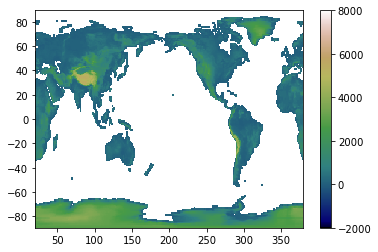

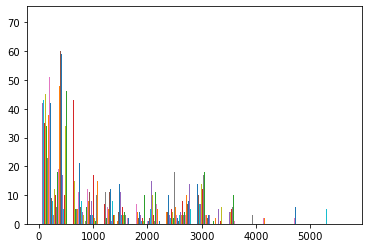

In [58]:
topo_above_sealevel=np.where(topo2d>0,topo2d,np.nan)
plt.pcolormesh(lon2d,lat2d,topo_above_sealevel,vmin=-2000,vmax=8000,cmap=cm)
plt.colorbar()
plt.show()

plt.hist(topo_above_sealevel)
plt.show()

## Summary:

### Useful matplotlib.pyplot functions for displaying 2-dimensional data

- *plt.contour*  : draws isolines depicting regions of equal value 
- *plt.contourf* : similar to contour plot but draws filled contours
- *plt.meshgrid* : graticule plot of the 2dimensional data using fill colors to depict the values

Different behavior we find in the way the 2-dim array is displayed when using plt.imshow
- plt.imshow

The 2-dimensional data array is using index coordinate system similar to that of a spreadsheet table. The top left cell is the first row and first column in the 2-dim data array. Function _plt.imshow()_ uses fill colors to colorize the image pixels according to the values in the 2-d array. Top left grid point corresponds to the value in the first row and first column. 

__Tip__: Function _plt.imshow()_ has a keyword parameter _origin_. You can use it to change the behavior and have the row index count start at the bottom in your figure.


### Numpy index operations

- subsampling 2-dimensional arrays can be done directly by providing the index ranges for both dimensions
- subsampling with logical expressions need more careful approach:
    - first create a logical expression for sampling along the first dimension and save the resuling 2d array
    - work with the result from the previous step and create a logical expression for sampling along the second dimension. 
- np.where is a good method to search for index locations where a logical expression is True. It uses the elements of the array and checks if the logical expression is True. However, this must be done with extra care. 




### Technical Note: What is this NetCDF format?

It is data format widely used in atmospheric and climate sciences.  
Many observational datasets and weather/ climate model outputs come in this format. 
If you see data files with an extension  .nc .nc4 .cdf .CDF, these are NetCDF files.

Python has a package that can read such data sets, including the metadata.




## References: 
- [ETOPO high resolution data set](https://maps.ngdc.noaa.gov/viewers/wcs-client/)
- [Unidata NetCDF documentation](https://www.unidata.ucar.edu/software/netcdf/docs/index.html)
- [Color maps in matplotlib](https://matplotlib.org/examples/color/colormaps_reference.html)